# Explore here

In [4]:
import shutil
import os
#necesito poder diferenciar cuales imagenes son de perro y cuales son de gato, es por eso que utilizamos de forma conveniente el nombre de cada archivo porque inician con 'cat' o con 'dog'

def separar_imagenes(ruta_carpeta):
    archivos = os.listdir(ruta_carpeta)
    for archivo in archivos:
        if archivo.startswith("dog"):
            destino = os.path.join(ruta_carpeta, "dog")
        elif archivo.startswith("cat"):
            destino = os.path.join(ruta_carpeta, "cat")
        else:
            continue
        if not os.path.exists(destino):
            os.makedirs(destino)
        shutil.move(os.path.join(ruta_carpeta, archivo),destino)
separar_imagenes("../data/raw/train/")

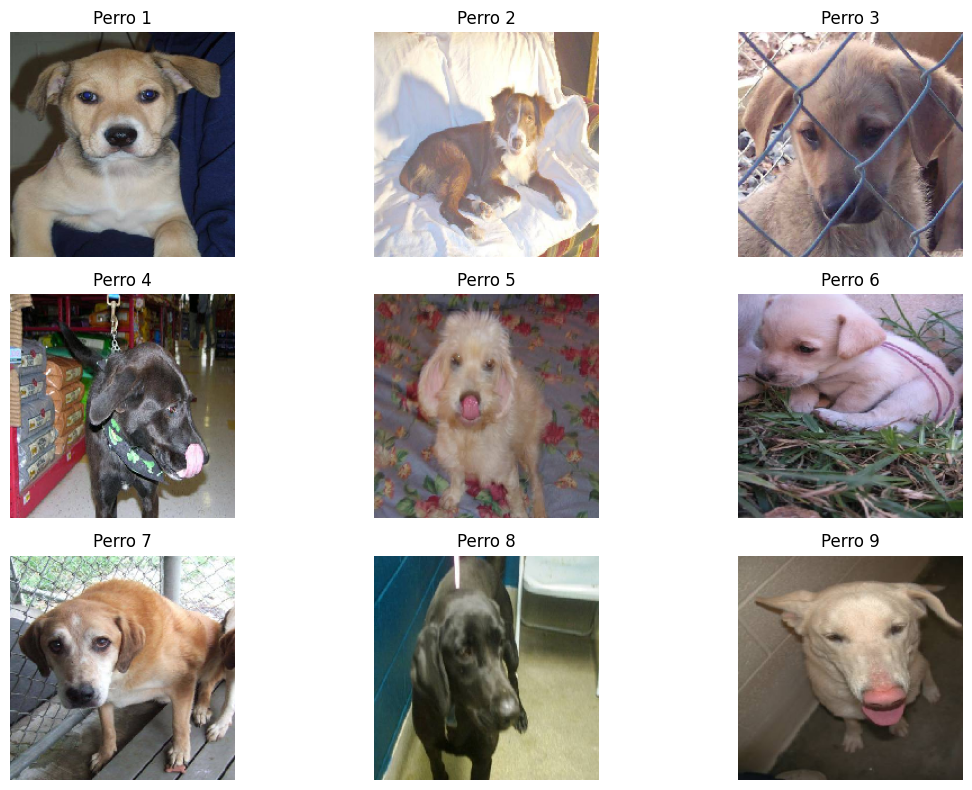

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

data_dir = "../data/raw/train/"
subfolder_dogs = os.path.join(data_dir, "dog")
imagenes_perros = os.listdir(subfolder_dogs)
dog_images = [] #lista vacía
for i in range(9):
    ruta_imagen = os.path.join(subfolder_dogs, imagenes_perros[i])
    img = image.load_img(ruta_imagen, target_size=(200,200)) #el target size permite configurar las dimensiones de la imagen
    img_array= image.img_to_array(img)
    img_array = img_array / 255.0 #Las imagenes a colores tienen una representacion entre 0 y 255 por pixel, entonces debo dividirla por 255
    dog_images.append(img_array)

plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dog_images[i])
    plt.axis("off")
    plt.title("Perro "+ str(i+1))

plt.tight_layout()
plt.show()

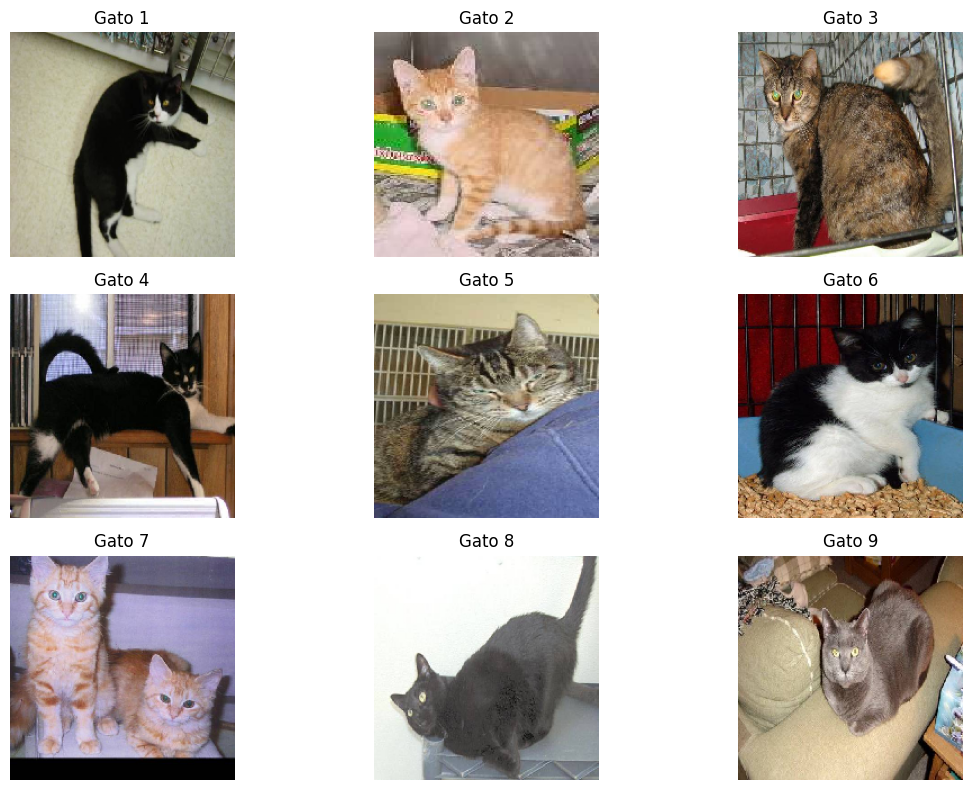

In [12]:
#data_dir = "../data/raw/train/"
subfolder_cats = os.path.join(data_dir, "cat")
imagenes_gatos = os.listdir(subfolder_cats)
cat_images = [] #lista vacía
for i in range(9):
    ruta_imagen = os.path.join(subfolder_cats, imagenes_gatos[i])
    img = image.load_img(ruta_imagen, target_size=(200,200)) #el target size permite configurar las dimensiones de la imagen
    img_array= image.img_to_array(img)
    img_array = img_array / 255.0 #Las imagenes a colores tienen una representacion entre 0 y 255 por pixel, entonces debo dividirla por 255
    cat_images.append(img_array)

plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cat_images[i])
    plt.axis("off")
    plt.title("Gato "+ str(i+1))

plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "../data/raw/train/"
test_dir = "../data/raw/"
image_size = (200,200)
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes=["dog","cat"]
)
test_data = datagentrain.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes=["test1"]
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-20 17:38:22.842025: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2024-11-20 17:38:23.120883: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-11-20 17:38:23.347803: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-11-20 17:38:23.420282: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-11-

In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])